In [ ]:
## FEATURE ENGINEERING AND SELECTION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split




In [2]:
# Load the dataset
file_path = '/home/rguktongle/Documents/DS-ML/DS-ML_UDEMY/heart.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Display basic statistics
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Check for missing values
data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

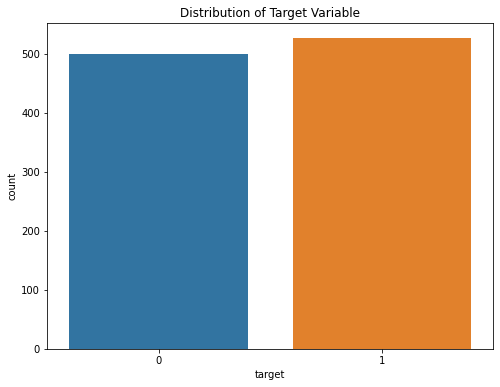

In [5]:
# Plot distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()


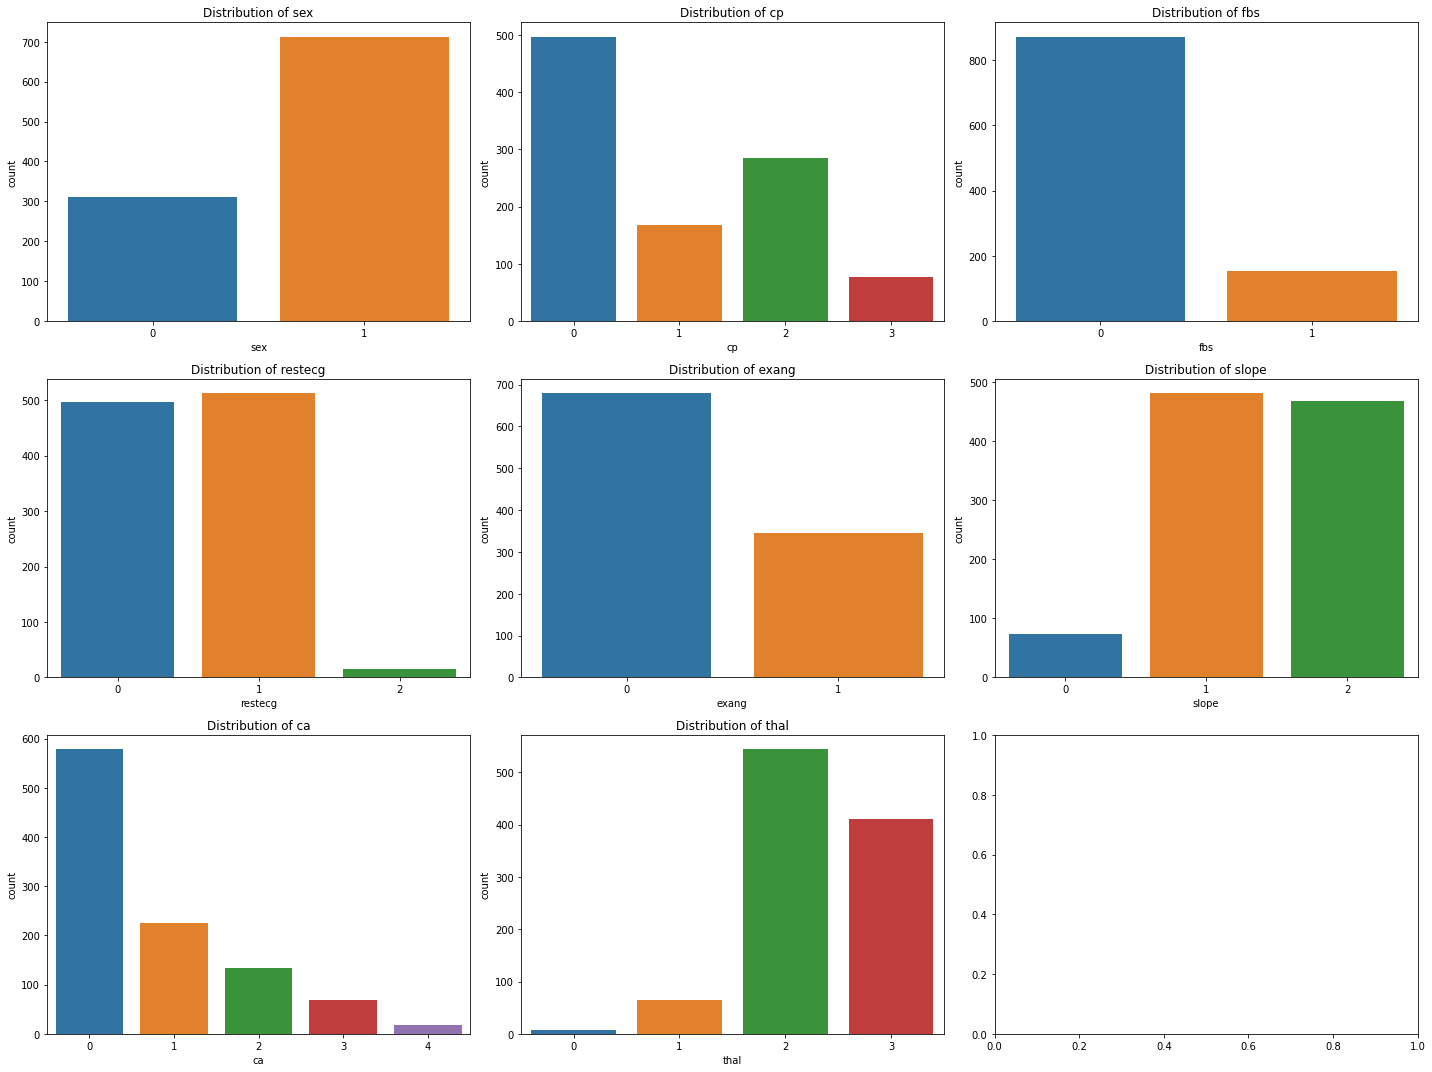

In [6]:
# Plot categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


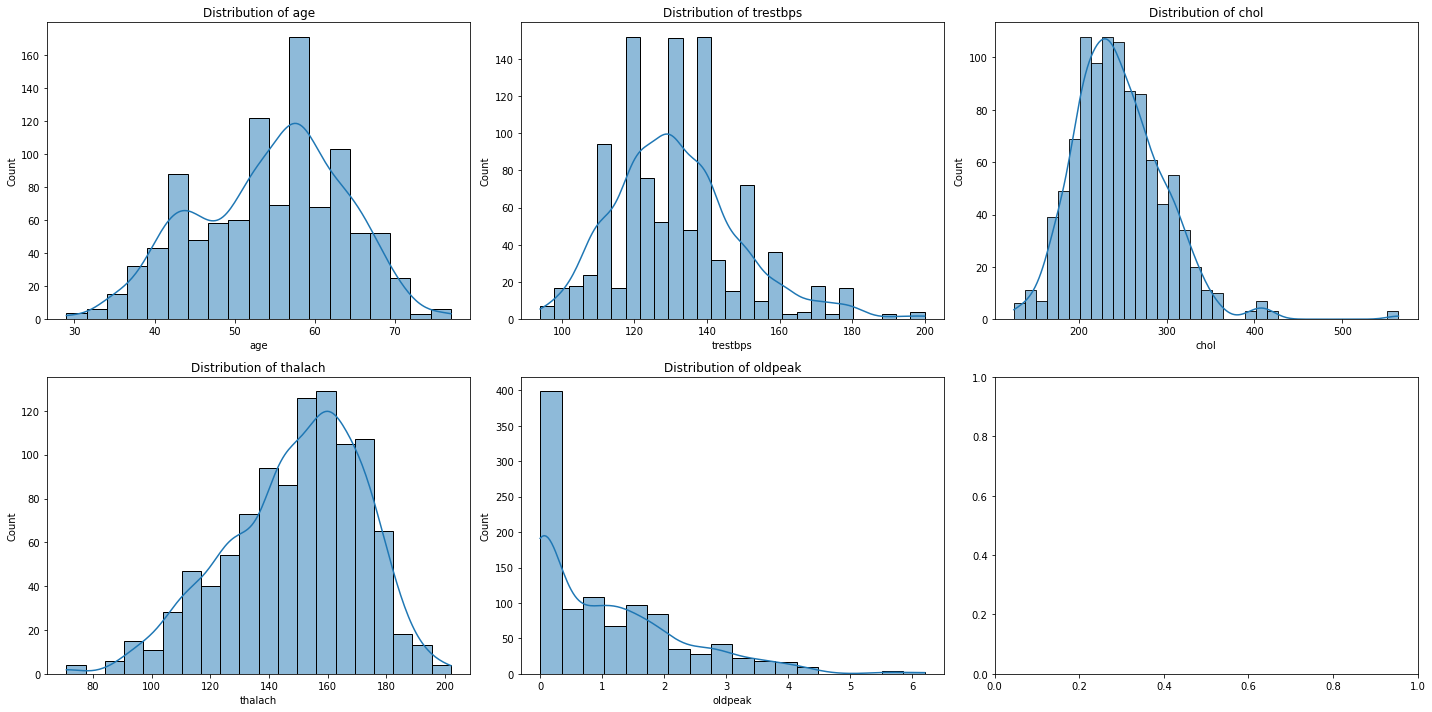

In [7]:
# Plot continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(continuous_features):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [8]:
# Create polynomial features for selected columns
poly = PolynomialFeatures(degree=2, include_bias=False)
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
poly_features = poly.fit_transform(data[selected_columns])

# Get feature names
poly_feature_names = poly.get_feature_names_out(selected_columns)

# Create a DataFrame with the new polynomial features
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate the polynomial features with the original dataset
data_enhanced = pd.concat([data, poly_df], axis=1)

# Display the first few rows of the enhanced dataset
data_enhanced.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,trestbps^2,trestbps chol,trestbps thalach,trestbps oldpeak,chol^2,chol thalach,chol oldpeak,thalach^2,thalach oldpeak,oldpeak^2
0,52,1,0,125,212,0,1,168,0,1.0,...,15625.0,26500.0,21000.0,125.0,44944.0,35616.0,212.0,28224.0,168.0,1.00
1,53,1,0,140,203,1,0,155,1,3.1,...,19600.0,28420.0,21700.0,434.0,41209.0,31465.0,629.3,24025.0,480.5,9.61
2,70,1,0,145,174,0,1,125,1,2.6,...,21025.0,25230.0,18125.0,377.0,30276.0,21750.0,452.4,15625.0,325.0,6.76
3,61,1,0,148,203,0,1,161,0,0.0,...,21904.0,30044.0,23828.0,0.0,41209.0,32683.0,0.0,25921.0,0.0,0.00
4,62,0,0,138,294,1,1,106,0,1.9,...,19044.0,40572.0,14628.0,262.2,86436.0,31164.0,558.6,11236.0,201.4,3.61


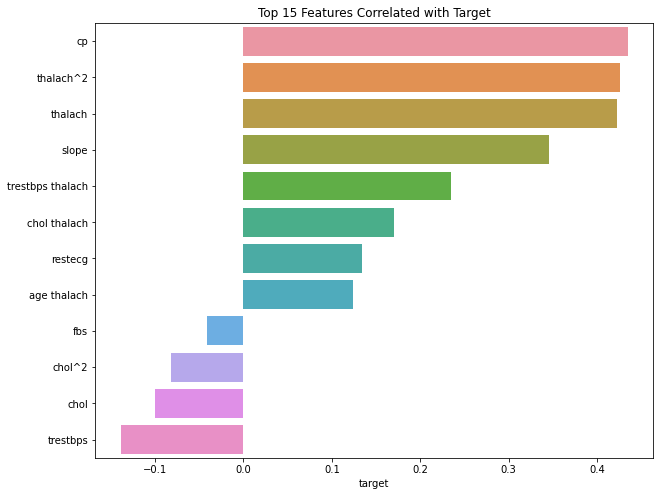

In [9]:
# Compute the correlation matrix
corr_matrix = data_enhanced.corr()

# Get correlations with the target variable
target_corr = corr_matrix['target'].sort_values(ascending=False)

# Plot the top 15 features most correlated with the target variable
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr[1:16], y=target_corr.index[1:16])
plt.title('Top 15 Features Correlated with Target')
plt.show()


In [ ]:
## Feature Importance using Random Forest

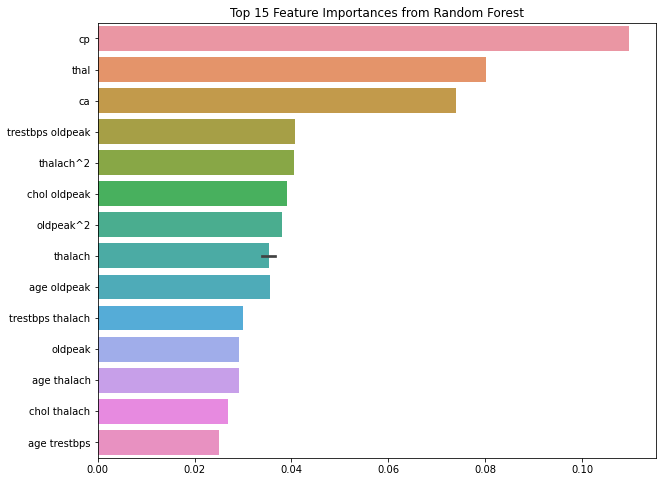

In [10]:
# Prepare the data for the model
X = data_enhanced.drop(columns='target')
y = data_enhanced['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Plot the top 15 feature importances
top_features = feature_importances.nlargest(15)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_features, y=top_features.index)
plt.title('Top 15 Feature Importances from Random Forest')
plt.show()


In [11]:
# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)


Explained variance ratio by each component:
[0.28749809 0.19516536 0.12155273 0.10935534 0.0688457  0.04079751
 0.03288793 0.0281074  0.02747664 0.02495769 0.02121406]


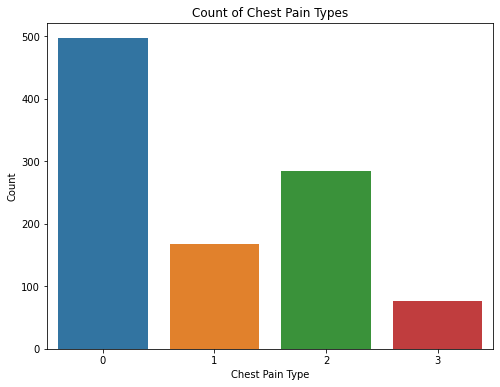

In [14]:
# Count plot for chest pain type (cp)
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', data=data)
plt.title('Count of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


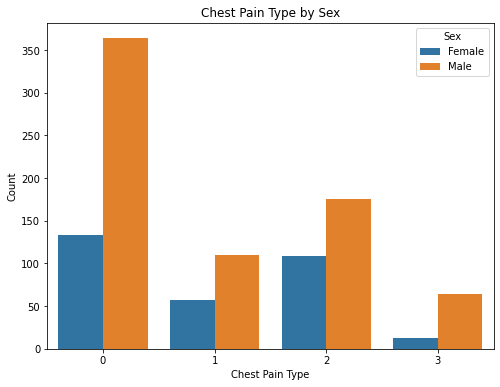

In [15]:
# Count plot for chest pain type by sex
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='sex', data=data)
plt.title('Chest Pain Type by Sex')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right', labels=['Female', 'Male'])
plt.show()


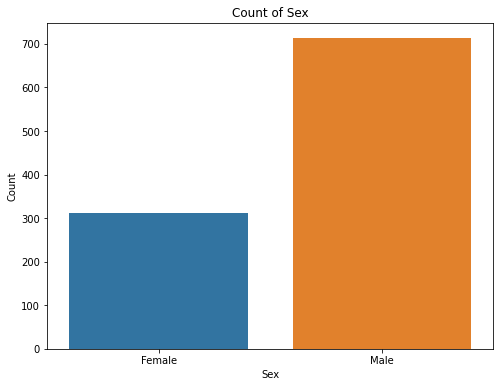

In [16]:
# Count plot for sex
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=data)
plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


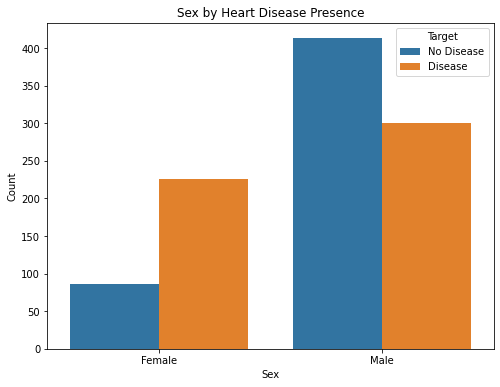

In [17]:
# Count plot for sex by target (heart disease presence)
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=data)
plt.title('Sex by Heart Disease Presence')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Target', loc='upper right', labels=['No Disease', 'Disease'])
plt.show()


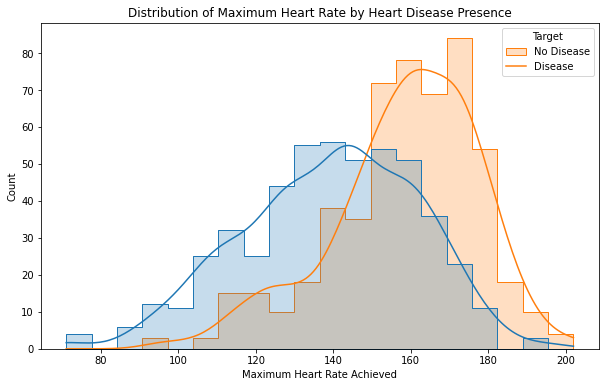

In [18]:
# Distribution plot for maximum heart rate achieved by target
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='thalach', hue='target', kde=True, element='step')
plt.title('Distribution of Maximum Heart Rate by Heart Disease Presence')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Count')
plt.legend(title='Target', loc='upper right', labels=['No Disease', 'Disease'])
plt.show()


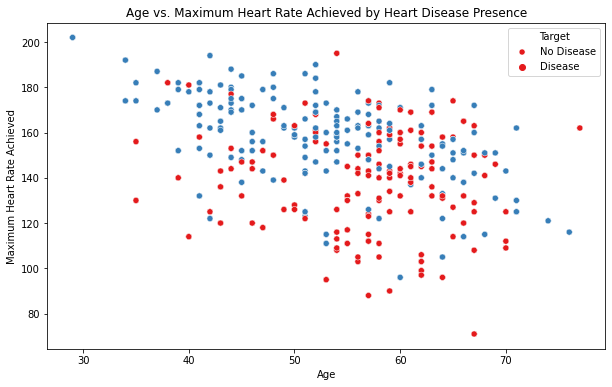

In [19]:
# Scatter plot of age vs. maximum heart rate achieved by target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=data, palette='Set1')
plt.title('Age vs. Maximum Heart Rate Achieved by Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.legend(title='Target', loc='upper right', labels=['No Disease', 'Disease'])
plt.show()


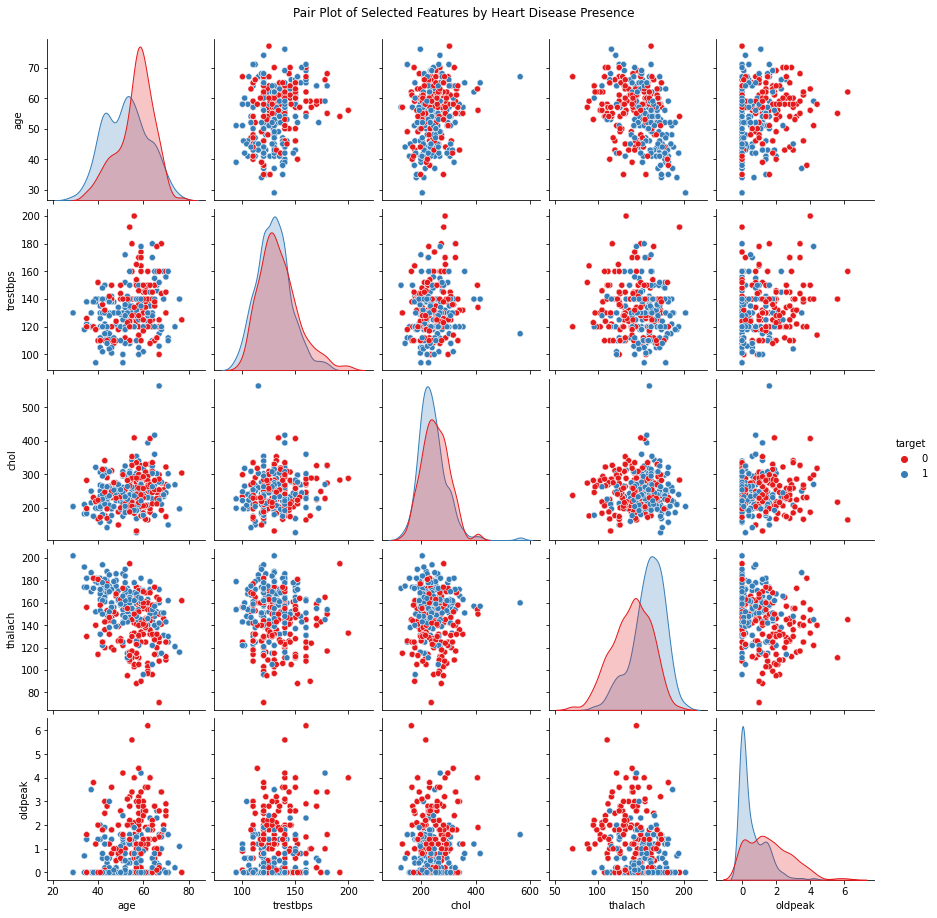

In [24]:
# Pair plot of selected features by target
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(data[selected_features], hue='target', palette='Set1')
plt.suptitle('Pair Plot of Selected Features by Heart Disease Presence', y=1.02)
plt.show()


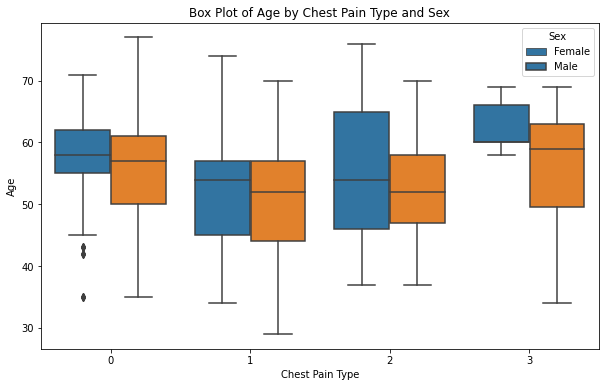

In [25]:
# Box plot of age by chest pain type and sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='cp', y='age', hue='sex', data=data)
plt.title('Box Plot of Age by Chest Pain Type and Sex')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.legend(title='Sex', loc='upper right', labels=['Female', 'Male'])
plt.show()


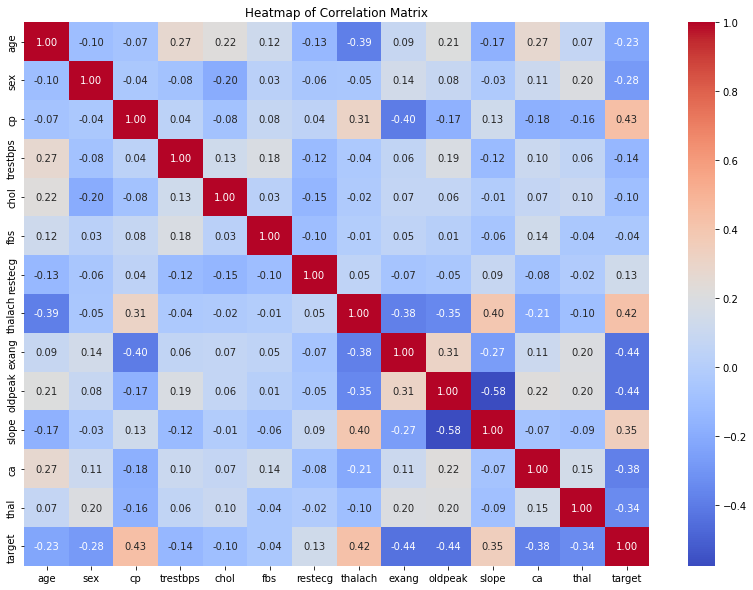

In [26]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()


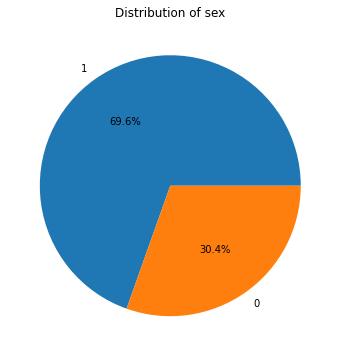

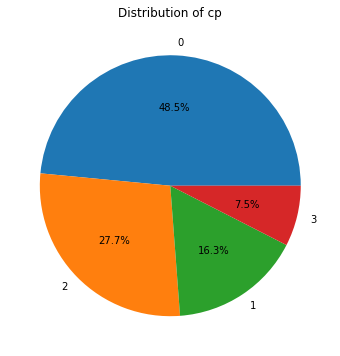

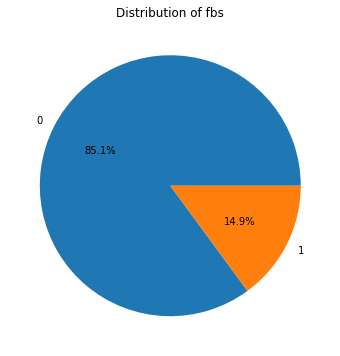

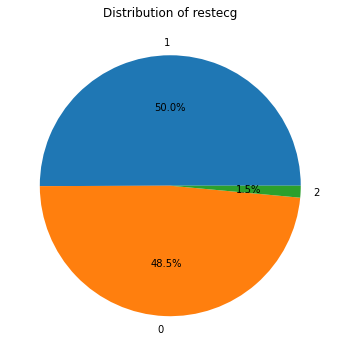

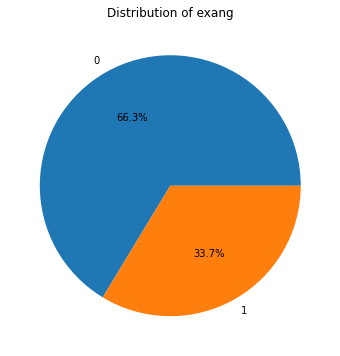

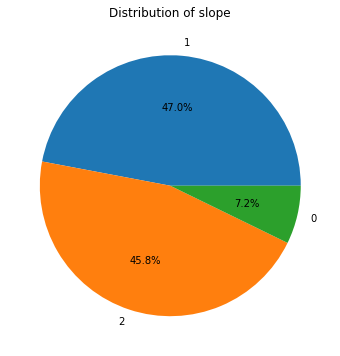

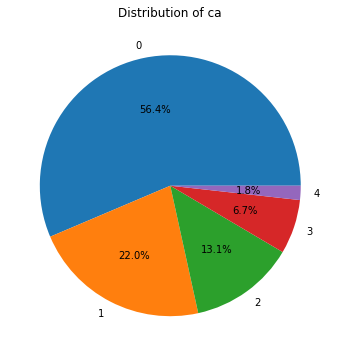

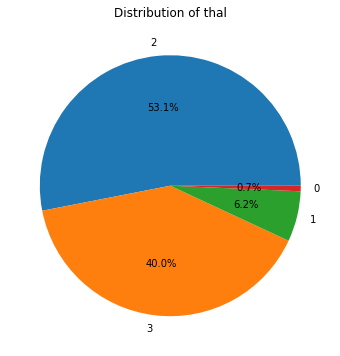

In [27]:
# Plot pie chart for categorical features
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    data[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')
    plt.ylabel('')
    plt.show()


In [13]:
# Summarize findings
print("Summary of EDA and Feature Selection:")
print("1. Significant features correlated with heart disease: cp, thalach, thalach^2, slope.")
print("2. Random Forest identified important features: cp, thalach, age, oldpeak.")
print("3. PCA helped in reducing dimensionality while preserving 95% variance.")
print("4. Visualizations provide insights into the distribution and impact of features on heart disease.")


Summary of EDA and Feature Selection:
1. Significant features correlated with heart disease: cp, thalach, thalach^2, slope.
2. Random Forest identified important features: cp, thalach, age, oldpeak.
3. PCA helped in reducing dimensionality while preserving 95% variance.
4. Visualizations provide insights into the distribution and impact of features on heart disease.
